<a href="https://colab.research.google.com/github/Liping-LZ/BDAO_DSDO/blob/main/Web_crawler%26API/01_Web_scraping_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Web Scraping with *requests* and *BeautifulSoup*

Web scraping refers to extraction of data from websites. This tutorial will use one example to show you how to extract information from one website and some summarisation of the best practice.

## 1. Understand HTML page structure
Before you scrape the data from the website, one key thing is that you inspect the HTML page you are targeting and know how to identify that parts that you want to scrape. Thus, it is very important to have some understanding of the HTML page structure before learning about web scraping.

Hypertext Markup Language (HTML) is the standard markup language for creating Web pages. HTML describes the structure of a web page.


HTML consists of a series of elements that "tell" to the browser how to display the content. HTML elements label pieces of content such as "this is a heading", "this is a paragraph", "this is a link", etc. using tags.

The following is a simple example of HTML document:

`<!DOCTYPE html>`

`<html>`

`<head>`

`<title>`Page Title`</title>`

`</head>`

`<body>`

`<h1>`My First Heading`</h1>`

`<p>`My first paragraph.`</p>`

`</body>`

`</html>`


Here explains the tags:

The `<!DOCTYPE html>` declaration defines this document is an HTML5 document.

The`<html>` element is the root element of an HTML page.

The `<head>` element contains meta information about the HTML page

The `<title>` element specifies a title for the HTML page.

The `<body>` element contains the visible page content, such as headings, paragraphs, images, hyperlinks, tables, lists, etc.

The `<h1>` element defines a large heading.

The `<p>` element defines a paragraph.

The `<a>` element defines a hyperlink.

Sometimes, there will be `<div>` tag which defines a division or a section in an HTML document. It's usually a container for other elements.

HTML tags normally come in pairs like `<p>` and `</p>`. Between two tags there will be the content. For example, in this case, in between `<p>` and `</p>`, there will the content of the paragraph which will be shown in the browser.

Thus, before you scrape a website. You need to inspect the page (shift+ctrl+I in windows chrome, Command+Option+i in Mac! and see which part you want the information from and what tags they are having so you have some ideas about defining the elements while scraping the data.


Next we will use example to show you how to scrape data from a website.

##2. Web Scraping with `requests` and `BeautifulSoup`

What is `BeautifulSoup`?

It is a Python library for pulling data out of HTML and XML files. It provides methods to navigate the document's tree structure that we discussed before and scrape its content. Basically, we make request to retrive content from an HTML page, and then parse  the whole HTML page using BeautifulSoup ("put into the soup"). After that, we will be able to find and extract the exact content we want from the soup by HTML tags. The below picture shows how it works:
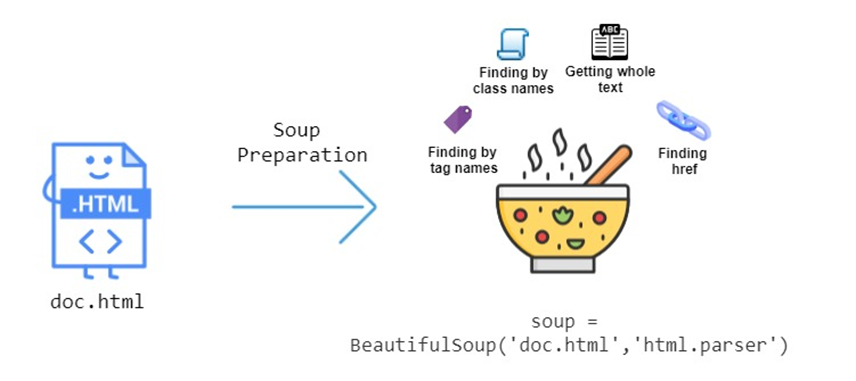

###Step 1: Import packages

In [ ]:
# import packages

import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup


###Step 2: Make the request to the website.
Here we are extracting information from a website https://www.scrapethissite.com/. This website provides sandbox for learning web scraping, so it is a good one to start and learn some basics. We will show a real-world example later after showing the steps.

we will try to get information from one of example page provided in this website: https://www.scrapethissite.com/pages/simple/ which is showing data of countries in the world.

The web page looks like this: ![picture](https://drive.google.com/uc?id=1OCuyF5_SOXvhs_0Hwqz5tyL5J4c5PFct)

In [ ]:
url = 'https://www.scrapethissite.com/pages/simple/' # Define the url
response = requests.get(url) # Use requests to retrieve data from a given URL

In [ ]:
# Here we can check whether we have retrived content successfully
print(response.text[:500])

<!doctype html>
<html lang="en">
  <head>
    <meta charset="utf-8">
    <title>Countries of the World: A Simple Example | Scrape This Site | A public sandbox for learning web scraping</title>
    <link rel="icon" type="image/png" href="/static/images/scraper-icon.png" />

    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <meta name="description" content="A single page that lists information about all the countries in the world. Good for those just get started with w


Through the `print()` function, we can see we have already made the request successfully to the page that we want extract information from.

###Step 3: Parse the HTML page using BeautifulSoup

In [ ]:
# Parse the whole HTML page using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Title of the parsed page
soup.title

<title>Countries of the World: A Simple Example | Scrape This Site | A public sandbox for learning web scraping</title>

In [ ]:
# We can also get the page title without the HTML tags
soup.title.string

'Countries of the World: A Simple Example | Scrape This Site | A public sandbox for learning web scraping'

Through BeautifulSoup as shown in the above code, we have parsed the whole page and define it as soup which is ready to be used to extract information/data. We have try get the title of page to test whether it is working properly. Good news is that it works! yeah!

###Step 4: We can start extract information we need from the website

In [ ]:
# For example, we can try extracting all the h1 tags
page_h1 = soup.find_all('h1')
print(page_h1)

[<h1>
                            Countries of the World: A Simple Example
                            <small>250 items</small>
</h1>]


We can also try extracting a specific tag by specifying a particular CSS class and only return text. For example, we want to get the paragraph under the title in this page as shown in the below image. By inspection of the HTML code, we can see it is with `<p>` tag and the clss is `lead`. Next, we will specifiy the tag and the class to get the content we want.

![picture](https://drive.google.com/uc?id=1BJ_uNQCA9XnID6HKG43KSXk5jylsUqJA)

In [ ]:
p_tag = soup.find('p', class_='lead')
print(p_tag.get_text()) # We use .get_text() to only return the text information.


                            A single page that lists information about all the countries in the world. Good for those just get started with web scraping.
                            Practice looking for patterns in the HTML that will allow you to extract information about each country. Then, build a simple web scraper that makes a request to this page, parses the HTML and prints out each country's name.
                        


Congratulations! It seems all work. Next, let's try something more complicated and might be more meaningful for you.

We are going to extract all the country information in this page and then to organise them into a dataframe. And this makes more sense to use web scraping because it will cost lots of time we only copy paste one by one.

Let's inspect the page first (as the images shown below).

First, we found that each country information is under `<div>` tag and the class name is `col-md-4.country`(label 1), each row has three items and we can see the list of three <div> with the same class name (label 2), and there are multiple rows to put all 250 country information (label 3).

![picture](https://drive.google.com/uc?id=12m6fyNkfyuZq4w0AnFasH22dQxMt7bof)

Then, we can look closer to understand where we can get the exact information, like the country name, capital, population and area as we see on the screen. And through the HTML code, we will find that the country name is the `<h3>` tag with class name `country-name`. And all the detailed information are in a separate division `<div>` with class name `country-info`. Inside the division, `<span>` tag is used to show each info with different class name: `country-capital`, `country-population`, `country-area`.

![picture](https://drive.google.com/uc?id=1N5yiqN3wmOPXZPL6FXXsjMAeTutOYRoH)

Thus, if we can find out all these tags and classes and extract the text and then we will get all information we need! Let's start!

First, we need to find all the country items by using the tag `<div>` and class name `col-md-4 country`.

In [ ]:
country = soup.find_all('div',class_ = 'col-md-4 country')
len(country) # Check the number of items

250

Here we can see we have successfully get all 250 items! That's good start!

Second, we need to find all the country names. The tag is `<h3>` and the class name is `country-name`. Since there are 250 countries, we need to use for loop to find out each h3 tag with country name.

In [ ]:
country[0].select('h3.country-name')

[<h3 class="country-name">
 <i class="flag-icon flag-icon-ad"></i>
                             Andorra
                         </h3>]

In [ ]:
country_name = [] # Create an empty list
for i in range(len(country)):
  country_name.append(country[i].select('h3.country-name')[0].get_text(strip=True))


country_name

['Andorra',
 'United Arab Emirates',
 'Afghanistan',
 'Antigua and Barbuda',
 'Anguilla',
 'Albania',
 'Armenia',
 'Angola',
 'Antarctica',
 'Argentina',
 'American Samoa',
 'Austria',
 'Australia',
 'Aruba',
 'Åland',
 'Azerbaijan',
 'Bosnia and Herzegovina',
 'Barbados',
 'Bangladesh',
 'Belgium',
 'Burkina Faso',
 'Bulgaria',
 'Bahrain',
 'Burundi',
 'Benin',
 'Saint Barthélemy',
 'Bermuda',
 'Brunei',
 'Bolivia',
 'Bonaire',
 'Brazil',
 'Bahamas',
 'Bhutan',
 'Bouvet Island',
 'Botswana',
 'Belarus',
 'Belize',
 'Canada',
 'Cocos [Keeling] Islands',
 'Democratic Republic of the Congo',
 'Central African Republic',
 'Republic of the Congo',
 'Switzerland',
 'Ivory Coast',
 'Cook Islands',
 'Chile',
 'Cameroon',
 'China',
 'Colombia',
 'Costa Rica',
 'Cuba',
 'Cape Verde',
 'Curacao',
 'Christmas Island',
 'Cyprus',
 'Czech Republic',
 'Germany',
 'Djibouti',
 'Denmark',
 'Dominica',
 'Dominican Republic',
 'Algeria',
 'Ecuador',
 'Estonia',
 'Egypt',
 'Western Sahara',
 'Eritrea',
 

From the above result, we can see we have retrieved all the country names and put them into the list. Here is some further explanation of the code. First, we create an empty `list` named `country_name` and then use `.append()` to add all the found items into the list. Next, we use `range(len(country))` to know about the length of the items and then set the range (0, total length), this is because we need to loop from first item until the 250 item. Of course, if you already know the number of items, you can just put `range(0,25)` which will return you the same result. Then we have `country[i]` to loop each country tag we have found through the previous code. And `.select('tag-class_name)` is used to find the sepcific tag with class name within each country tag. What we need is just the text part without the tags, so we use .get_text() to achieve that. You might also notice that there is `[0] `following `.select('tag-class_name)` and this is because when you select the tag it is returned a list. Though there is only 1 item in the list, you need to define `[0]` to get the item from the list. After we put `.get_text()`, we will see a text with lots of spaces or \n label returned and this is not what we want. So, we put strip =True as parameter inside `.get_text()` to only return the string without spaces. You can try the below codes which split the above code into multiple steps for you check what I have told you.

In [ ]:
country[0].select('h3.country-name')
# Here we can see the output is a list

[<h3 class="country-name">
 <i class="flag-icon flag-icon-ad"></i>
                             Andorra
                         </h3>]

In [ ]:
country[0].select('h3.country-name')[0]
# By defining [0] we can only get the item from the list

<h3 class="country-name">
<i class="flag-icon flag-icon-ad"></i>
                            Andorra
                        </h3>

In [ ]:
country[0].select('h3.country-name')[0].get_text()
# Without strip, we will see spaces and \n labels and it looks random

'\n\n                            Andorra\n                        '

In [ ]:
country[0].select('h3.country-name')[0].get_text(strip=True)
# With strip, we are only getting the country name and it looks good!

'Andorra'

So now you got the idea how we are searching and extracting information by tag and class step by step. We can also make our code neat with only one line. The below example is using what we called list comprehension, where we put the for loop inside the list. And this returns exactly the same result as the for loop we put earlier. You can check this link to better understand how list comprehension works: https://www.w3schools.com/python/python_lists_comprehension.asp

In [ ]:
country_name = [country[i].select('h3.country-name')[0].get_text(strip=True) for i in range(len(country))]

Next, we will do the same to get all the country information. The code is almost the same, only changing the tag and class name. As we mentioned earlier, all the country information are shown with span tag and with different class names.

In [ ]:
country_capital = [] # Create an empty list
for i in range(len(country)):
  country_capital.append(country[i].select('span.country-capital')[0].get_text(strip=True))

country_population = [] # Create an empty list
for i in range(len(country)):
  country_population.append(country[i].select('span.country-population')[0].get_text(strip=True))

country_area = [] # Create an empty list
for i in range(len(country)):
  country_area.append(country[i].select('span.country-area')[0].get_text(strip=True))

Similarly, we can use list comprehension to get all the lists showing capital, population and area.

In [ ]:
country_capital = [country[i].select('span.country-capital')[0].get_text(strip=True) for i in range(len(country))]
country_population = [country[i].select('span.country-population')[0].get_text(strip=True) for i in range(len(country))]
country_area = [country[i].select('span.country-area')[0].get_text(strip=True) for i in range(len(country))]

Next, we will put all the codes together and create a dataframe to put all the information we got. Finally you will note we use the time module in order to make the script wait - via sleep( ). This is good practice when scraping websites as a script can make a lot of requests very quickly and overload the website server. We sleep for a random time just for fun. We also time the whole process using the Notebook function %%time.

In [ ]:
%%time

from random import randint
from time import sleep
import requests
from bs4 import BeautifulSoup

url = 'https://www.scrapethissite.com/pages/simple/' # Define the url
response = requests.get(url) # Use requests to retrieve data from a given URL
soup = BeautifulSoup(response.text, 'html.parser')
country = soup.find_all('div',class_ = 'col-md-4 country')

country_name = [country[i].select('h3.country-name')[0].get_text(strip=True) for i in range(len(country))]
country_capital = [country[i].select('span.country-capital')[0].get_text(strip=True) for i in range(len(country))]
country_population = [country[i].select('span.country-population')[0].get_text(strip=True) for i in range(len(country))]
country_area = [country[i].select('span.country-area')[0].get_text(strip=True) for i in range(len(country))]


sleep(randint(1,3))

CPU times: user 520 ms, sys: 7.83 ms, total: 528 ms
Wall time: 3.17 s


In [ ]:
import pandas as pd
df = pd.DataFrame({"Name":country_name,"Capital":country_capital,"Population":country_population,"Area":country_area})
df.head()

,Name,Capital,Population,Area
0,Andorra,Andorra la Vella,84000,468.0
1,United Arab Emirates,Abu Dhabi,4975593,82880.0
2,Afghanistan,Kabul,29121286,647500.0
3,Antigua and Barbuda,St. John's,86754,443.0
4,Anguilla,The Valley,13254,102.0


That's it! We have scraped something from a website :)

### Next, let's try to get the top movies from imdb.com, a real website.
We have found that imdb has listed the top 250 films in this page:http://www.imdb.com/chart/top. Our aim is to get all the information from this table including title, cast, rating and number of ratings.

In [2]:
# import packages

import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup

In [3]:
# Define the IMDB page where we want to get the top movie information
imdb_url = 'http://www.imdb.com/chart/top'

The web page looks like this:
![picture](https://drive.google.com/uc?id=19qx3DAmpb4H6wfWH7AYNbBXFmgr8R75Q)

Same steps: make request and parge the page. check the title to make sure we have got the right page.

In [4]:
# When scraping a real website, it is very easy to be blocked if not done proper.
# For good practice, I would suggest define user-agent first and then add the user agent as headers to make request.
# So basically you are letting the server know who is making request.
# Without doing this, you might get 403 forbidden and cannot extract anything from the page.

hdr = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36'}
# Use requests to retrieve data from a given URL
imdb_response = requests.get(imdb_url, headers = hdr)

# Parse the whole HTML page using BeautifulSoup
imdb_soup = BeautifulSoup(imdb_response.text, 'html.parser')

# Title of the parsed page
imdb_soup.title

<title>IMDb Top 250 Movies</title>

Next we need to inspect the page (shift+ctrl+i, or option_command+i). This page looks way more complex than the previous one. We aim to collect all the movie title, published year and ratings. And there are different tags and class names for each item. The good news is that each movie info shares the same element name for the items (title, year and rating). We will need to find out all the elements first.

First, the whole list is organised under the tag `<li>`. The <`li>` HTML element is used to represent an item in a list. And the class name is `ipc-metadata-list-summary-item sc-1364e729-0 caNpAE cli-parent`(as the image shown below). First, we will do the same as we did for the previous scraping job-get all the information of the whole list and then look for specific items we need within this list.

![picture](https://drive.google.com/uc?id=1vQdaq9blLwtRnwmsXrEs4PuufAzNHWCA)

In [5]:
movie_list = imdb_soup.find_all('li',class_ = 'ipc-metadata-list-summary-item sc-10233bc-0 iherUv cli-parent')
len(movie_list)

250

This is a list with top 250 movies and the above output is telling we have got it right. Next we will find the tags of movie title, year, rating score and rating counts. Still inspect the page (shown as the below image)

![picture](https://drive.google.com/uc?id=1szAbY-Y5ozLcuPC31zdPXtX9vv45fbvx)
![picture](https://drive.google.com/uc?id=16lbb0UHRiCbhYnuGIKPmarWs6K8uHMh-)
![picture](https://drive.google.com/uc?id=1-XLWlrCeQqXiwEm7N5oYfY1ad7bgD5Mc)
![picture](https://drive.google.com/uc?id=1KQP8CS76UFC23XGnsoSeLP2usloGKdEp)

Most of them looks fine, except for the rating score and rating counts which are inside a group and that might require a bit more work. We will talk about it later. Okay, now we got all the elements, so we can start extracting information like we did before. Here are the elements for each item we need:

1) Movie title: h3.ipc-title__text

2) Year/Time: span.sc-b189961a-8.kLaxqf.cli-title-metadata-item
These two information are stored with the same tag and class, so we will use [0] to get year, and [1] to get time following the order we see here.

3) Rating score: span.ipc-rating-star.ipc-rating-star--base.ipc-rating-star--imdb ratingGroup--imdb-rating, inside the attribute [aria-label].

4) Rating counts: span.ipc-rating-star--voteCount

First, we extract the movie title and this part is quite straightforward and it works exactly the same as the previous example.

In [6]:
movie_title = [movie_list[i].select('h3.ipc-title__text')[0].get_text(strip=True) for i in range(len(movie_list))]

Then, we need to extract the year and the duration time. This part is slightly different. Because we extract the main list but the year and time are put into another list, before we get the year and time we need to loop the list within the movie list in order to find the items.

In [7]:
year = []
time = []
for movie in movie_list:
  year.append(movie.select('span.sc-b189961a-8.kLaxqf.cli-title-metadata-item')[0].text) # year is the first item, so [0] and use .text to only print text information
  time.append(movie.select('span.sc-b189961a-8.kLaxqf.cli-title-metadata-item')[1].text) # year is the first item, so [1] and use .text to only print text information

In [8]:
# We can put them in list comprehension
year = [movie.select('span.sc-b189961a-8.kLaxqf.cli-title-metadata-item')[0].text for movie in movie_list]
time = [movie.select('span.sc-b189961a-8.kLaxqf.cli-title-metadata-item')[1].text for movie in movie_list]

For rating score, we still need to loop the list first and then we are not extracting the text component, we need the information from attribution (aria-label). Also, the aria-label returns "IMDB rating: xx" and we just need the score, so we split it by ":" and only take the score component.

In [18]:
rating_score = [a.attrs.get('aria-label').split(':')[1] for movie in movie_list for a in movie.select('span.ipc-rating-star.ipc-rating-star--base.ipc-rating-star--imdb.ratingGroup--imdb-rating')]

For rating counts, we are doing it the same as how we get the year and the duration time. What is different is that we need to call [0] since when we .select('span.ipc-rating-star--voteCount') it returns a list and the item is the [0] item. And then we use .get_text() to get the text component and also add strip=True to remove all space and use strip("()") to remove the brackets from the text.

In [10]:
rating_count = [movie.select('span.ipc-rating-star--voteCount')[0].get_text(strip=True).strip("()") for movie in movie_list]

In [19]:
# we can check our data and see whether they are all good
[movie_title[0], year[0], time[0], rating_score[0],rating_count[0]]

['1. The Shawshank Redemption', '1994', '2h 22m', ' 9.3', '2.9M']

All looks good! So we have got the title, year, duration time, rating_score and rating_count. Next, we are putting them all together and create a dataframe to put all information in.

In [20]:
%%time

from random import randint
from time import sleep
import requests
from bs4 import BeautifulSoup

hdr = {'User-Agent': 'Mozilla/5.0'} # user-agent
# Use requests to retrieve data from a given URL
imdb_response = requests.get(imdb_url, headers = hdr)

# Parse the whole HTML page using BeautifulSoup
imdb_soup = BeautifulSoup(imdb_response.text, 'html.parser')

movie_list = imdb_soup.find_all('li',class_ = 'ipc-metadata-list-summary-item sc-10233bc-0 iherUv cli-parent')

movie_title = [movie_list[i].select('h3.ipc-title__text')[0].get_text(strip=True) for i in range(len(movie_list))]
year = [movie.select('span.sc-b189961a-8.kLaxqf.cli-title-metadata-item')[0].text for movie in movie_list]
time = [movie.select('span.sc-b189961a-8.kLaxqf.cli-title-metadata-item')[1].text for movie in movie_list]
rating_score = [a.attrs.get('aria-label').split(':')[1] for movie in movie_list for a in movie.select('span.ipc-rating-star.ipc-rating-star--base.ipc-rating-star--imdb.ratingGroup--imdb-rating')]
rating_count = [movie.select('span.ipc-rating-star--voteCount')[0].get_text(strip=True).strip("()") for movie in movie_list]

sleep(randint(1,3))

CPU times: user 1.22 s, sys: 19.6 ms, total: 1.24 s
Wall time: 3.77 s


In [21]:
import pandas as pd

#after we get all the data in lists, we can transform them into dataframe which can be checked easily in a table.
top_movies = pd.DataFrame({'Movie_title':movie_title, 'Year':year,'Duration_time': time,
                           'Rating': rating_score, 'Rating_counts': rating_count})

In [22]:
top_movies

,Movie_title,Year,Duration_time,Rating,Rating_counts
0,1. The Shawshank Redemption,1994,2h 22m,9.3,2.9M
1,2. The Godfather,1972,2h 55m,9.2,2M
2,3. The Dark Knight,2008,2h 32m,9.0,2.9M
3,4. The Godfather Part II,1974,3h 22m,9.0,1.4M
4,5. 12 Angry Men,1957,1h 36m,9.0,866K
...,...,...,...,...,...
245,246. The Help,2011,2h 26m,8.1,493K
246,247. It Happened One Night,1934,1h 45m,8.1,112K
247,248. Aladdin,1992,1h 30m,8.0,467K
248,249. Dances with Wolves,1990,3h 1m,8.0,291K


Great! We have done it! You can download the data as well.

In [ ]:
from google.colab import files
top_movies.to_csv('top_movies.csv')
files.download('top_movies.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Exercise

Scrape the main table of [UK's Yearly Box Office](https://www.boxofficemojo.com/intl/uk/yearly/) and try to answer the following:
1. Which year of the #1 release got the biggest total gross?
2. Which year of the #1 release got the biggest number of releases?

[Link to solution.](https://colab.research.google.com/drive/14Izp9DBCKs9948hF11JCfGys7zpX0jnx?usp=sharing)